# Non-Linear Insights with Linear Models: Feature Discretization

In this notebook, we explore the concept of feature discretization and its impact on linear models, enabling them to capture non-linear relationships in the data. This technique enhances model interpretability and performance on complex datasets.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


## Generating Synthetic Data

We start by generating a synthetic dataset with continuous features to simulate a real-world data scenario.


In [2]:
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, n_clusters_per_class=1, random_state=42)


## Visualizing Original Data

Visualizing the original data helps us understand the distribution and relationship between features and classes.


Text(0, 0.5, 'Feature 2')

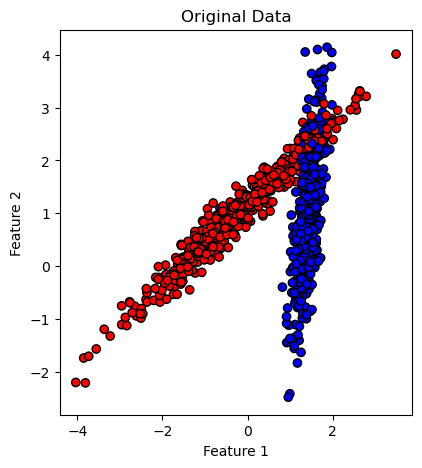

In [3]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


## Feature Discretization

Feature discretization, or binning, transforms continuous features into discrete bins, allowing linear models to capture non-linear relationships.


In [4]:
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(X[:, :2])


/Users/diogoribeiro/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


## Visualizing Discretized Data

After discretization, we plot the data to visualize how continuous features have been transformed into discrete bins.


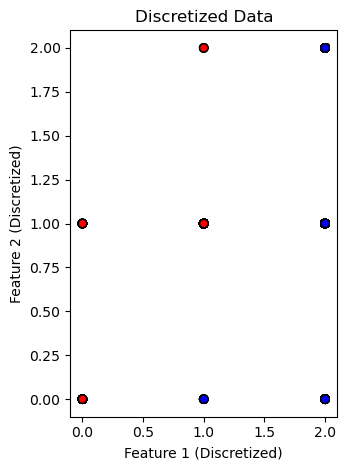

In [5]:
plt.subplot(1, 2, 2)
plt.scatter(X_discretized[:, 0], X_discretized[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
plt.title('Discretized Data')
plt.xlabel('Feature 1 (Discretized)')
plt.ylabel('Feature 2 (Discretized)')
plt.tight_layout()
plt.show()


## Model Training and Evaluation

We train logistic regression models on both the original and discretized datasets to compare their performance.


In [6]:
# Step 5: Train a logistic regression model on the original data
X_train, X_test, y_train, y_test = train_test_split(X[:, :2], y, test_size=0.2, random_state=42)
model_original = LogisticRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

# Step 6: Train a logistic regression model on the discretized data
X_train_discretized, X_test_discretized, _, _ = train_test_split(X_discretized, y, test_size=0.2, random_state=42)
model_discretized = LogisticRegression()
model_discretized.fit(X_train_discretized, y_train)
y_pred_discretized = model_discretized.predict(X_test_discretized)
accuracy_discretized = accuracy_score(y_test, y_pred_discretized)


## Decision Boundary Visualization

Plotting the decision boundaries for both models allows us to visually compare their performance and understand how discretization affects model predictions.


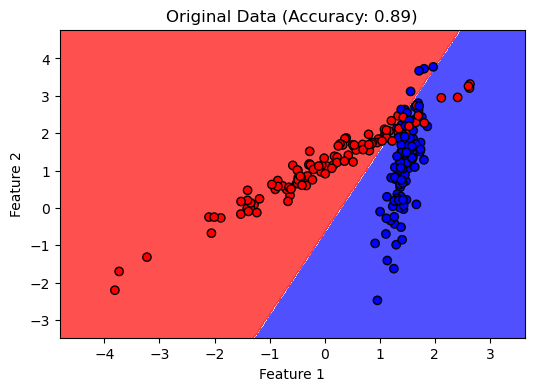

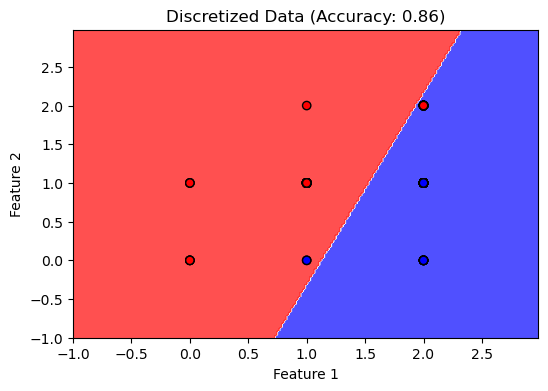

In [7]:
# Define the plot_decision_boundary function
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6, 4))
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries
plot_decision_boundary(model_original, X_test, y_test, f'Original Data (Accuracy: {accuracy_original:.2f})')
plot_decision_boundary(model_discretized, X_test_discretized, y_test, f'Discretized Data (Accuracy: {accuracy_discretized:.2f})')


## Conclusion

This notebook demonstrated the power of feature discretization in enabling linear models to approximate non-linear relationships. By discretizing features, we can significantly improve model interpretability and performance on complex datasets.
